In [27]:
# Imports
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
import seaborn as sns

import pandas as pd

In [28]:
accidents = pd.read_csv('data/MA3_finished.csv', index_col='ID')

In [29]:
accidents.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Year,Month,Day,Hour,Duration
count,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06
mean,3.525778e+06,2.202578e+00,3.618415e+01,-9.457055e+01,5.685456e-01,6.186961e+01,6.441538e+01,2.951444e+01,9.107071e+00,7.691129e+00,2.020027e+03,6.685881e+00,2.599904e+00,1.242746e+01,2.694761e+04
std,2.035609e+06,4.802376e-01,5.122709e+00,1.730333e+01,1.764164e+00,1.904205e+01,2.275718e+01,1.014852e+00,2.642265e+00,5.412225e+00,1.864212e+00,3.639135e+00,1.805649e+00,5.428667e+00,8.166324e+05
min,0.000000e+00,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02
25%,1.762889e+06,2.000000e+00,3.329151e+01,-1.171585e+02,0.000000e+00,4.900000e+01,4.800000e+01,2.934000e+01,1.000000e+01,4.600000e+00,2.019000e+03,3.000000e+00,1.000000e+00,8.000000e+00,2.068000e+03
50%,3.525778e+06,2.000000e+00,3.581709e+01,-8.767776e+01,3.700000e-02,6.400000e+01,6.700000e+01,2.984000e+01,1.000000e+01,7.000000e+00,2.020000e+03,7.000000e+00,3.000000e+00,1.300000e+01,4.502000e+03
75%,5.288666e+06,2.000000e+00,4.011675e+01,-8.036947e+01,4.780000e-01,7.600000e+01,8.400000e+01,3.002000e+01,1.000000e+01,1.040000e+01,2.022000e+03,1.000000e+01,4.000000e+00,1.700000e+01,7.539000e+03
max,7.051555e+06,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.023000e+03,1.200000e+01,6.000000e+00,2.300000e+01,1.687763e+08


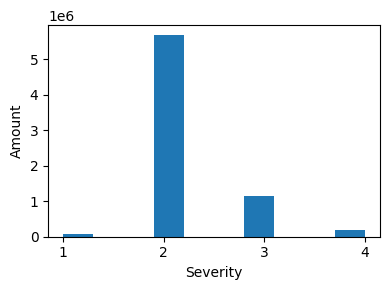

In [3]:
plt.figure(figsize=(4, 3))
plt.hist(accidents['Severity'])
plt.xlabel('Severity')
plt.ylabel('Amount')
plt.xticks(range(int(accidents['Severity'].min()), int(accidents['Severity'].max()) + 1))
plt.tight_layout()

In [4]:
#features = accidents[['Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
#                         'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

features = accidents[['Weather_Condition', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Duration']]

target = accidents['Severity']

In [5]:
#Encoding text/categorical variables
le = LabelEncoder()
features['Weather_Condition']= le.fit_transform(features['Weather_Condition'])

C:\Users\forte\AppData\Local\Temp\ipykernel_7000\1052699683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Weather_Condition']= le.fit_transform(features['Weather_Condition'])


In [6]:
#(80/20 split)
features_train, features_test, target_train, target_test = train_test_split(features, target)
#weiteraufteiler
features_train, features_dev, target_train, target_dev = train_test_split(features_train, target_train)

print(len(features_train), len(features_dev), len(features_test))

3966500 1322167 1762889


In [7]:
#Model trainieren
clf = LinearRegression()
clf.fit(features_train, target_train)

LinearRegression()

In [8]:
print(clf.intercept_, clf.coef_)

1.632339590207378 [ 9.03303909e-04  9.91797393e-03 -6.54430589e-04  7.93723009e-05
  1.77267260e-02  1.92729962e-03  2.81610546e-03  3.17919092e-10]


In [9]:
#Vorhersage
predicted = clf.predict(features_dev)
expected = target_dev

print('RMSE: ')
RMSE(expected, predicted)

RMSE: 


0.22859879924959065

In [10]:
poly = PolynomialFeatures(2)
features_train_polynom = poly.fit_transform(features_train)
features_dev_polynom = poly.fit_transform(features_dev)

In [11]:
clf.fit(features_train_polynom, target_train)

predicted = clf.predict(features_dev_polynom)
expected = target_dev

print('RMSE: ')
RMSE(expected, predicted)

RMSE: 


0.22813441445801258

In [17]:
features.describe()

,Weather_Condition,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duration
count,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06,7.051556e+06
mean,4.150992e+01,5.685456e-01,6.186961e+01,6.441538e+01,2.951444e+01,9.107071e+00,7.691129e+00,2.694761e+04
std,3.624777e+01,1.764164e+00,1.904205e+01,2.275718e+01,1.014852e+00,2.642265e+00,5.412225e+00,8.166324e+05
min,0.000000e+00,0.000000e+00,-4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02
25%,1.500000e+01,0.000000e+00,4.900000e+01,4.800000e+01,2.934000e+01,1.000000e+01,4.600000e+00,2.068000e+03
50%,1.500000e+01,3.700000e-02,6.400000e+01,6.700000e+01,2.984000e+01,1.000000e+01,7.000000e+00,4.502000e+03
75%,8.300000e+01,4.780000e-01,7.600000e+01,8.400000e+01,3.002000e+01,1.000000e+01,1.040000e+01,7.539000e+03
max,1.390000e+02,4.417500e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,1.687763e+08


In [18]:
accidents['Severity'].head()

ID
0    2
1    3
2    2
3    3
4    2
Name: Severity, dtype: int64

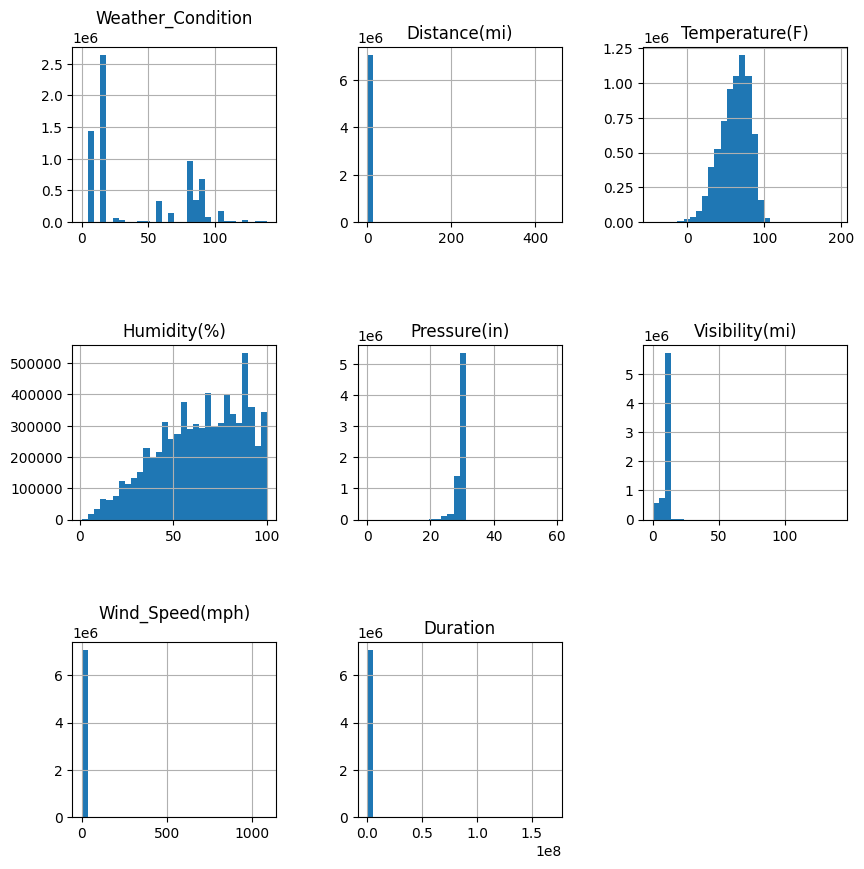

In [19]:
features.hist(figsize=(10,10), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [25]:
features_of_interest=['Temperature(F)', 'Humidity(%)']
accidents[features_of_interest].describe()

,Temperature(F),Humidity(%)
count,7.051556e+06,7.051556e+06
mean,6.186961e+01,6.441538e+01
std,1.904205e+01,2.275718e+01
min,-4.500000e+01,1.000000e+00
25%,4.900000e+01,4.800000e+01
50%,6.400000e+01,6.700000e+01
75%,7.600000e+01,8.400000e+01
max,1.960000e+02,1.000000e+02


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

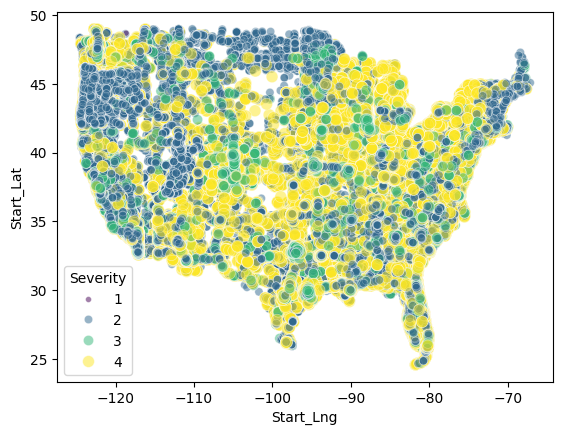

In [30]:
sns.scatterplot(
    data = accidents,
    x = 'Start_Lng',
    y = 'Start_Lat',
    size = 'Severity',
    hue = 'Severity',
    palette = 'viridis',
    alpha = 0.5,
)
